In [ ]:
import zipfile
import os

zip_path = "/content/Dataset.zip"

#extract content
extract_dir = "/content"
with zipfile.ZipFile(zip_path,"r") as zip_ref:
  zip_ref.extractall(extract_dir)

In [ ]:
source_dir = "/content/Dataset"
target_dir = "/content/dataset/organized_classes"

os.makedirs(target_dir,exist_ok =True)

In [ ]:
images_per_class = 80
total_images = len(os.listdir(source_dir))
total_classes = total_images // images_per_class
print(f"num of classes:{total_classes}\nNo of Images:{total_images}")

num of classes:17
No of Images:1360


In [ ]:
image_files = sorted([f for f in os.listdir(source_dir) if f.endswith('.jpg')])

In [ ]:
import shutil

for idx, image_file in enumerate(image_files):
  class_number = (idx // images_per_class) + 1

  class_folder = os.path.join(target_dir,f"class_{class_number}")
  os.makedirs(class_folder,exist_ok = True) #Create a class folder if it doesnt exist

  src_path = os.path.join(source_dir, image_file)
  dest_path = os.path.join(class_folder,image_file)

  print(f"Moving: {src_path} -> {dest_path}")

  shutil.move(src_path,dest_path)

Moving: /content/Dataset/image_0001.jpg -> /content/dataset/organized_classes/class_1/image_0001.jpg
Moving: /content/Dataset/image_0002.jpg -> /content/dataset/organized_classes/class_1/image_0002.jpg
Moving: /content/Dataset/image_0003.jpg -> /content/dataset/organized_classes/class_1/image_0003.jpg
Moving: /content/Dataset/image_0004.jpg -> /content/dataset/organized_classes/class_1/image_0004.jpg
Moving: /content/Dataset/image_0005.jpg -> /content/dataset/organized_classes/class_1/image_0005.jpg
Moving: /content/Dataset/image_0006.jpg -> /content/dataset/organized_classes/class_1/image_0006.jpg
Moving: /content/Dataset/image_0007.jpg -> /content/dataset/organized_classes/class_1/image_0007.jpg
Moving: /content/Dataset/image_0008.jpg -> /content/dataset/organized_classes/class_1/image_0008.jpg
Moving: /content/Dataset/image_0009.jpg -> /content/dataset/organized_classes/class_1/image_0009.jpg
Moving: /content/Dataset/image_0010.jpg -> /content/dataset/organized_classes/class_1/image

In [ ]:
import os

data_path = "/content/dataset/organized_classes"

# Walk through directories and print contents
for root, dirs, files in os.walk(data_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Directory: /content/dataset/organized_classes
Subdirectories: ['class_17', 'class_9', 'class_10', 'class_5', 'class_13', 'class_15', 'class_2', 'class_1', 'class_11', 'class_3', 'class_4', 'class_16', 'class_6', 'class_8', 'class_14', 'class_7', 'class_12']
Files: []
----------------------------------------
Directory: /content/dataset/organized_classes/class_17
Subdirectories: []
Files: ['image_1344.jpg', 'image_1318.jpg', 'image_1320.jpg', 'image_1287.jpg', 'image_1302.jpg', 'image_1292.jpg', 'image_1315.jpg', 'image_1304.jpg', 'image_1350.jpg', 'image_1283.jpg', 'image_1313.jpg', 'image_1293.jpg', 'image_1295.jpg', 'image_1332.jpg', 'image_1305.jpg', 'image_1294.jpg', 'image_1336.jpg', 'image_1330.jpg', 'image_1311.jpg', 'image_1284.jpg', 'image_1326.jpg', 'image_1285.jpg', 'image_1290.jpg', 'image_1314.jpg', 'image_1310.jpg', 'image_1301.jpg', 'image_1360.jpg', 'image_1341.jpg', 'image_1347.jpg', 'image_1307.jpg', 'image_1359.jpg', 'image_1282.jpg', 'image_1306.jpg', 'image_1358.jpg

In [ ]:
import shutil

# Remove all .ipynb_checkpoints folders recursively
checkpoints_path = os.path.join(data_path, ".ipynb_checkpoints")
if os.path.exists(checkpoints_path):
    shutil.rmtree(checkpoints_path)

print("Removed '.ipynb_checkpoints' folder.")

Removed '.ipynb_checkpoints' folder.


In [ ]:
from torchvision import datasets,transforms
from torch.utils.data import random_split,DataLoader

data_path = "/content/dataset/organized_classes"

transform = transforms.Compose([
    transforms.Resize(320, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop(300),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def is_valid_file(path):
  return path.lower().endswith(('.jpg'))
dataset = datasets.ImageFolder(root = data_path,transform = transform,is_valid_file=is_valid_file)

print(f"Total images in dataset:{len(dataset)}...")

Total images in dataset:1360...


In [ ]:
train_size = int(0.8 * len(dataset))
dev_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - dev_size
print(f"train Size:{train_size}\ntest_size:{test_size}\ndev_size:{dev_size}")

train Size:1088
test_size:136
dev_size:136


In [ ]:
#Creating train valid test dataset
train_dataset,dev_dataset,test_dataset = random_split(dataset,[train_size,dev_size,test_size])

In [ ]:
print(len(train_dataset))

1088


In [ ]:
#Create dataloaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset,batch_size = BATCH_SIZE,shuffle = True)
dev_loader = DataLoader(dev_dataset,batch_size = BATCH_SIZE,shuffle = False)
test_loader = DataLoader(test_dataset,batch_size = BATCH_SIZE,shuffle = False)

In [ ]:
# Print dataset sizes
print(f"Total dataset size: {len(dataset)}")
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(dev_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Total dataset size: 1360
Training set size: 1088
Validation set size: 136
Test set size: 136


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=be7da826d3c18566f8b5cd35cb57bf6aafdbd7c96cb3837c29c446cacef21430
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from efficientnet_pytorch import EfficientNet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from efficientnet_pytorch import EfficientNet

def create_efficientnet_b3(num_classes, freeze_base=True):
    model = EfficientNet.from_pretrained('efficientnet-b3')

    # Freeze or unfreeze the base layers
    if freeze_base:
        for param in model.parameters():
            param.requires_grad = False
    in_features = model._fc.in_features  # Access input features of the original _fc
    model._fc = nn.Linear(in_features, num_classes)  # Replace with new output layer
    return model


In [ ]:
for images,labels in train_loader:
  print(f"{images},label : {labels}")
  break

tensor([[[[-1.4329, -1.4500, -1.4500,  ...,  0.4166,  0.2624,  0.0912],
          [-1.3815, -1.3987, -1.4158,  ...,  0.4851,  0.3823,  0.2453],
          [-1.3644, -1.3644, -1.3815,  ...,  0.5878,  0.4679,  0.3652],
          ...,
          [-2.1008, -2.1008, -2.1008,  ...,  0.5364,  0.5878,  0.6906],
          [-2.1008, -2.1008, -2.1008,  ...,  0.5364,  0.6049,  0.7077],
          [-2.1008, -2.1008, -2.1008,  ...,  0.4679,  0.5878,  0.7077]],

         [[-1.7906, -1.7906, -1.8081,  ...,  0.3452,  0.1176, -0.1275],
          [-1.7556, -1.7731, -1.7906,  ...,  0.4853,  0.2402, -0.0574],
          [-1.7381, -1.7381, -1.7556,  ...,  0.5728,  0.3627,  0.0826],
          ...,
          [-2.0182, -2.0182, -2.0182,  ...,  0.3102,  0.4328,  0.5553],
          [-2.0182, -2.0182, -2.0182,  ...,  0.2402,  0.3803,  0.5553],
          [-2.0182, -2.0182, -2.0182,  ...,  0.1877,  0.3277,  0.5203]],

         [[-1.7522, -1.7696, -1.7522,  ...,  1.2108,  1.1237,  1.0714],
          [-1.7347, -1.7522, -

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def train_model(model,train_loader,dev_loader,criterion,optimizer,epochs = 50,patience=5,device = device):
  best_loss = np.inf
  patience_counter = 0
  train_losses,dev_losses = [], []
  train_acc, dev_acc = [],[]
  for epoch in range(epochs):
    model.train()
    total_train, correct_train, epoch_loss = 0, 0, 0
    for images,labels in train_loader:
      images, labels = images.to(device),labels.to(device)
      outputs = model(images)
      loss = criterion(outputs,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      epoch_loss += loss.item()
      _,preds = torch.max(outputs,1)
      correct_train += (preds == labels).sum().item()
      total_train += labels.size(0)
    train_losses.append(epoch_loss / len(train_loader))
    train_acc.append(correct_train / total_train)

    # Validation
    model.eval()
    total_dev,correct_dev,dev_loss = 0,0,0
    with torch.inference_mode():
      for images,labels in dev_loader:
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        loss = criterion(outputs,labels)

        dev_loss += loss.item()
        _,preds = torch.max(outputs,1)
        correct_dev += (preds == labels).sum().item()
        total_dev += labels.size(0)

      dev_losses.append(dev_loss / len(dev_loader))
      dev_acc.append(correct_dev / total_dev)


      print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Dev Loss: {dev_losses[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Dev Acc: {dev_acc[-1]:.4f}")

      #Early stopping
      if dev_losses[-1] < best_loss:
        best_loss = dev_losses[-1]
        torch.save(model.state_dict(),'best_model.pt')
        patience_counter = 0
      else:
        patience_counter += 1
        if patience_counter >= patience:
          print("Early stopping triggered")
          break
  return train_losses,dev_losses,train_acc,dev_acc

In [ ]:
#training with freezing base layers
# Initialize model, optimizer, and loss
model = create_efficientnet_b3(num_classes=17, freeze_base=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model._fc.parameters(), lr=0.001)

# Train
train_losses, dev_losses, train_acc, dev_acc = train_model(model, train_loader, dev_loader, criterion, optimizer)

# Load best model
model.load_state_dict(torch.load('best_model.pt'))

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth
100%|██████████| 47.1M/47.1M [00:00<00:00, 130MB/s]


Loaded pretrained weights for efficientnet-b3
Epoch 1/50, Train Loss: 2.1801, Dev Loss: 1.8178, Train Acc: 0.5717, Dev Acc: 0.6912
Epoch 2/50, Train Loss: 1.1835, Dev Loss: 1.1104, Train Acc: 0.8925, Dev Acc: 0.9044
Epoch 3/50, Train Loss: 0.7675, Dev Loss: 0.7324, Train Acc: 0.9311, Dev Acc: 0.9338
Epoch 4/50, Train Loss: 0.5728, Dev Loss: 0.5389, Train Acc: 0.9449, Dev Acc: 0.9485
Epoch 5/50, Train Loss: 0.4336, Dev Loss: 0.4544, Train Acc: 0.9596, Dev Acc: 0.9485
Epoch 6/50, Train Loss: 0.3814, Dev Loss: 0.4024, Train Acc: 0.9678, Dev Acc: 0.9485
Epoch 7/50, Train Loss: 0.3098, Dev Loss: 0.3637, Train Acc: 0.9697, Dev Acc: 0.9412
Epoch 8/50, Train Loss: 0.2732, Dev Loss: 0.3425, Train Acc: 0.9770, Dev Acc: 0.9412
Epoch 9/50, Train Loss: 0.2448, Dev Loss: 0.3233, Train Acc: 0.9853, Dev Acc: 0.9485
Epoch 10/50, Train Loss: 0.2056, Dev Loss: 0.3072, Train Acc: 0.9844, Dev Acc: 0.9559
Epoch 11/50, Train Loss: 0.1938, Dev Loss: 0.2962, Train Acc: 0.9825, Dev Acc: 0.9485
Epoch 12/50, Trai

<ipython-input-20-c1eecc357ccf>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


<All keys matched successfully>

In [ ]:
# Initialize model without freezing
model = create_efficientnet_b3(num_classes=17, freeze_base=False).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train
train_losses_ft, dev_losses_ft, train_acc_ft, dev_acc_ft = train_model(model, train_loader, dev_loader, criterion, optimizer)

# I wrote the wrong syntax here ya bashmohandes
model.load_state_dict(torch.load('best_model2.pth'))

Loaded pretrained weights for efficientnet-b3
Epoch 1/50, Train Loss: 2.4183, Dev Loss: 1.9536, Train Acc: 0.4835, Dev Acc: 0.6324
Epoch 2/50, Train Loss: 1.2177, Dev Loss: 0.8145, Train Acc: 0.9366, Dev Acc: 0.9338
Epoch 3/50, Train Loss: 0.4431, Dev Loss: 0.2761, Train Acc: 0.9733, Dev Acc: 0.9632
Epoch 4/50, Train Loss: 0.1842, Dev Loss: 0.1496, Train Acc: 0.9825, Dev Acc: 0.9779
Epoch 5/50, Train Loss: 0.0949, Dev Loss: 0.1297, Train Acc: 0.9936, Dev Acc: 0.9779
Epoch 6/50, Train Loss: 0.0624, Dev Loss: 0.0921, Train Acc: 0.9954, Dev Acc: 0.9853
Epoch 7/50, Train Loss: 0.0454, Dev Loss: 0.1000, Train Acc: 0.9963, Dev Acc: 0.9779
Epoch 8/50, Train Loss: 0.0335, Dev Loss: 0.0851, Train Acc: 0.9982, Dev Acc: 0.9853
Epoch 9/50, Train Loss: 0.0311, Dev Loss: 0.0787, Train Acc: 0.9972, Dev Acc: 0.9853
Epoch 10/50, Train Loss: 0.0206, Dev Loss: 0.0838, Train Acc: 1.0000, Dev Acc: 0.9853
Epoch 11/50, Train Loss: 0.0212, Dev Loss: 0.0837, Train Acc: 1.0000, Dev Acc: 0.9853
Epoch 12/50, Trai

<ipython-input-21-5bc8251a040c>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model2.pt'))


FileNotFoundError: [Errno 2] No such file or directory: 'best_model2.pt'

In [ ]:
model.load_state_dict(torch.load('best_model.pt'))

<ipython-input-23-7f68d31eee5b>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


<All keys matched successfully>

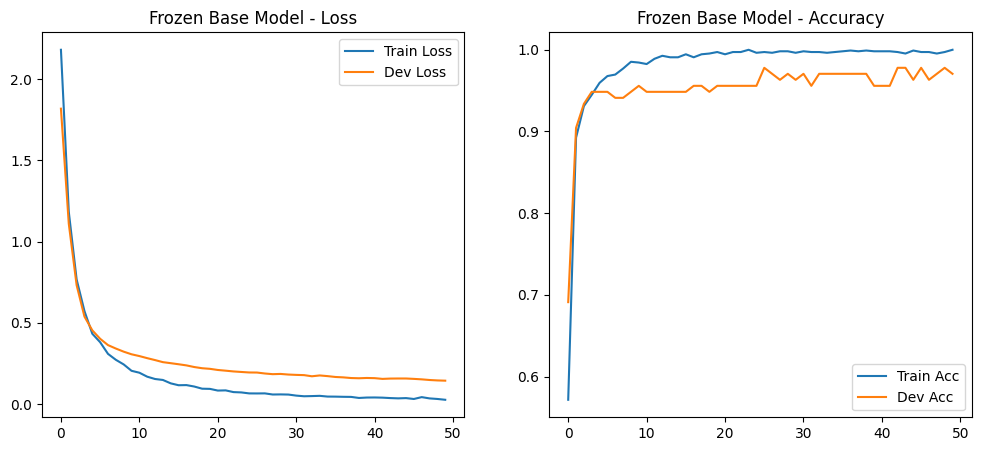

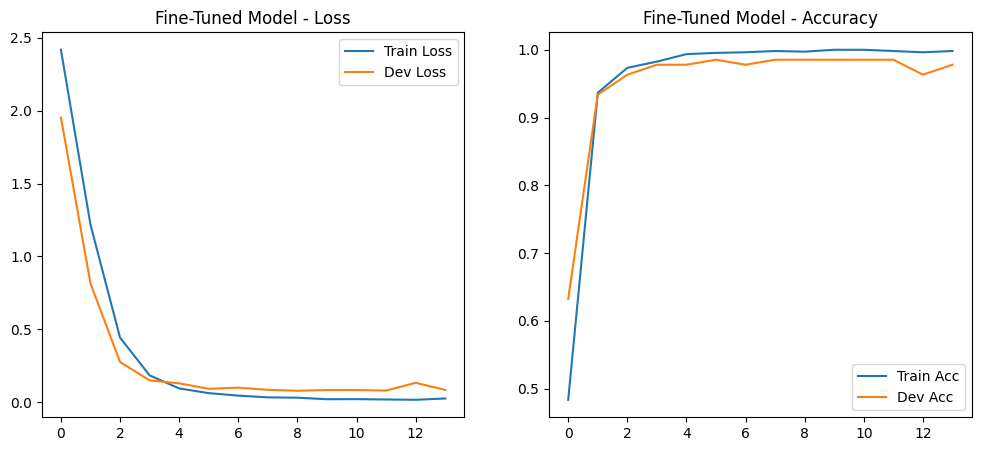

In [ ]:
def plot_curves(train_losses, dev_losses, train_acc, dev_acc, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(dev_losses, label='Dev Loss')
    plt.legend()
    plt.title(f"{title} - Loss")

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Acc')
    plt.plot(dev_acc, label='Dev Acc')
    plt.legend()
    plt.title(f"{title} - Accuracy")
    plt.show()

# Plot for both trials
plot_curves(train_losses, dev_losses, train_acc, dev_acc, "Frozen Base Model")
plot_curves(train_losses_ft, dev_losses_ft, train_acc_ft, dev_acc_ft, "Fine-Tuned Model")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       0.86      1.00      0.92         6
           6       1.00      0.92      0.96        12
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       0.90      1.00      0.95         9
          10       1.00      1.00      1.00         7
          11       1.00      0.90      0.95        10
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         9
          15       0.86      1.00      0.92         6
          16       1.00      0.83      0.91         6

    accuracy              

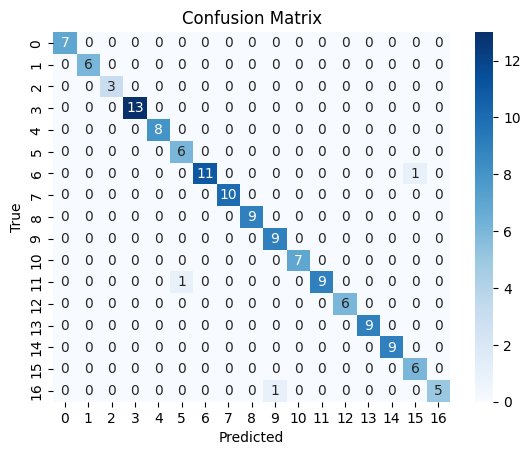

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_test(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.inference_mode():
        for images, labels in loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Evaluate for both models
evaluate_test(model, test_loader)
